# Title:Digit recognize of MNIST dataset

## Author:Nazish javeed
## Submission date:5-feb-2024
## Email:Nazishjaveed164@gmail.com
## Linkedin:https://www.linkedin.com/feed/
## Kaggle:https://www.kaggle.com/
## Github:https://github.com/

# Import the library

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn

# Check GPU are available or not

In [2]:
print(" GPU available : {}". format (torch.cuda.is_available ()))

 GPU available : True


 # If CUDA are not available used CPU

In [3]:
if torch.cuda.is_available():
  device = 'cuda'
else:
    device = 'cpu'

# Use transform word to normalize the data

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Split the mnist dataset in train and test format

In [5]:
trainset = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 116654633.12it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 38937863.65it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27778792.02it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11400675.50it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [6]:
testset = torchvision.datasets.MNIST('mnist',
                                     train = False,
                                     download = True,
                                     transform = transform)

# Check the pixels of train dataset

In [7]:
trainset.data.shape

torch.Size([60000, 28, 28])

# Check the pixels of test dataset

In [8]:
testset.data.shape

torch.Size([10000, 28, 28])

# Check the size of image

In [9]:
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])

torch.Size([10000, 28, 28])

In [10]:
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def imgshow(title = "", image = None, size = 6 ):
  w,h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()



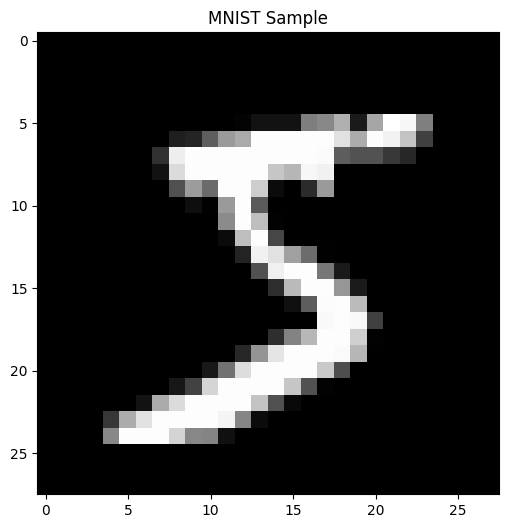

In [13]:
 image = trainset.data[0].numpy()
 imgshow('MNIST Sample', image)

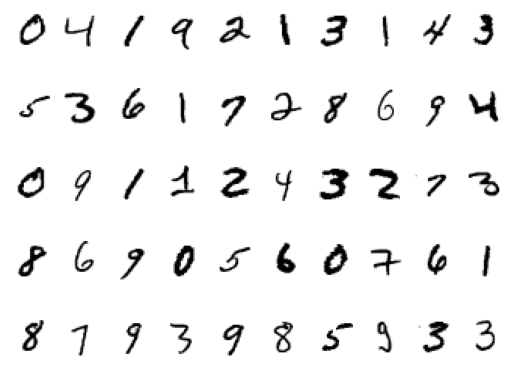

In [14]:
figure  = plt.figure()
num_of_imgs = 50

for index in range (1, num_of_imgs +1):
  plt.subplot(5,10, index)
  plt.axis('off')
  plt.imshow(trainset.data[index], cmap = 'gray_r')

In [15]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128, shuffle = True, num_workers = 0)
testloader = torch.utils.data.DataLoader(testset, batch_size = 128, shuffle = True, num_workers = 0)

In [16]:
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [17]:
dataiter = iter(trainloader)




In [18]:
for batch in trainloader:
    images, labels = batch
    print(images.shape)
    print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([1

In [19]:
images[0].shape

torch.Size([1, 28, 28])

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def imgshow(img):
  img = img/2+ 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

  dataiter = iter(trainloader)
  images, labels = batch


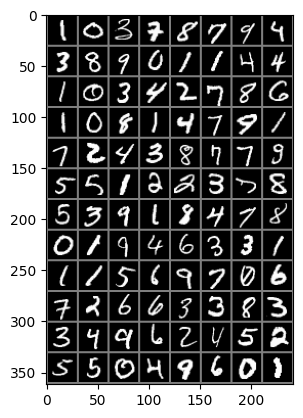

In [22]:
 imgshow(torchvision.utils.make_grid(images))

# Build a convolutional layer

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
class Model(nn.Module):
  def __int__(self):
    super(Model, self).__init__()

    self.conv1 = nn.Conv2d(1,32,3)
    self.conv2 = nn.Conv2d(32,64,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64 * 12 * 12, 128)
    self.fc2 = nn.Linear(128, 10)

  def  forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64*12*2)
    x = F.relu(self.fc1(x))

    return x



In [25]:
model = Model()
model.to(device)

Model()

# Discussion about loss function

In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

ValueError: optimizer got an empty parameter list